In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/jakarta_traffic_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Hari_Nama'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Hari_Nama'].isin(['Saturday', 'Sunday'])


##  Average Speed ​​per Day


In [7]:
df.groupby('Hari_Nama')['Average_Speed_kmh'].mean().reset_index().sort_values('Average_Speed_kmh', ascending=False)


,Hari_Nama,Average_Speed_kmh
2,Saturday,32.046875
3,Sunday,28.453125
4,Thursday,20.145000
5,Tuesday,19.693023
1,Monday,19.071667
6,Wednesday,18.435000
0,Friday,17.012500


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_9384\356235066.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hari_Nama', y='Average_Speed_kmh', data=df, estimator='mean', ci=None)


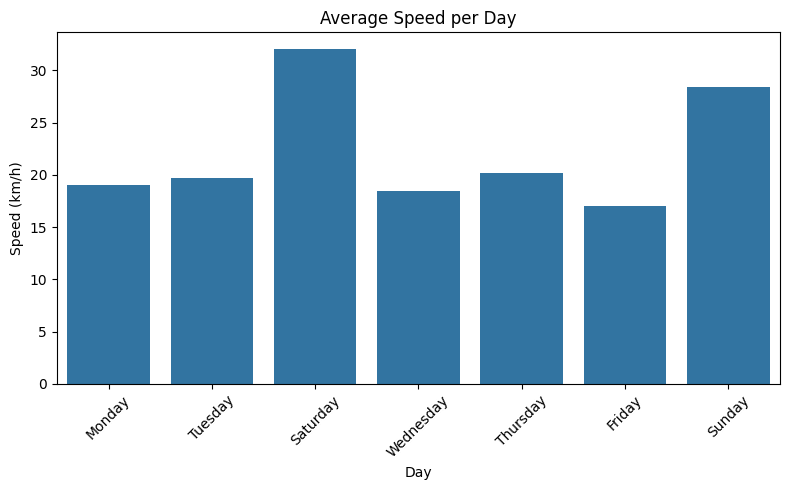

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x='Hari_Nama', y='Average_Speed_kmh', data=df, estimator='mean', ci=None)
plt.title('Average Speed per Day')
plt.xlabel('Day')
plt.ylabel('Speed (km/h)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Average Speed per Hour

In [8]:
df.groupby('Hour')['Average_Speed_kmh'].mean().reset_index()

,Hour,Average_Speed_kmh
0,7,20.222727
1,8,16.550000
2,9,22.597727
3,10,34.956250
4,11,31.887500
5,12,25.800000
6,13,NaN
7,14,28.287500
8,15,25.868750
9,17,18.234091


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_9384\2091297917.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Average_Speed_kmh', data=df, estimator='mean', ci=None)


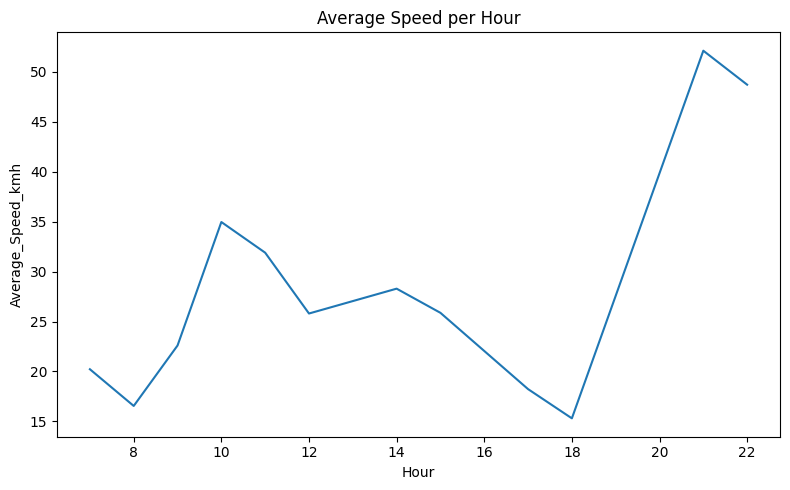

In [9]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Hour', y='Average_Speed_kmh', data=df, estimator='mean', ci=None)
plt.title('Average Speed per Hour')
plt.tight_layout()
plt.show()


## Speed by Road Type

In [10]:
df.groupby('Road_Type')['Average_Speed_kmh'].describe()

,count,mean,std,min,25%,50%,75%,max
Road_Type,,,,,,,,
Highway,71.0,22.304225,6.938020,12.1,17.8,20.2,25.450,42.3
Main_Road,143.0,17.372727,5.555522,8.4,13.3,16.4,19.950,35.4
Main_Road,1.0,48.700000,NaN,48.7,48.7,48.7,48.700,48.7
Secondary_Road,72.0,28.252778,7.610056,16.8,22.9,26.3,31.825,52.1


In [11]:
df['Road_Type'].unique()
df['Road_Type'].value_counts()

Road_Type
Main_Road         143
Highway            72
Secondary_Road     72
Main_Road           1
Name: count, dtype: int64

Resolution If There Is Format Duplication

In [12]:
df['Road_Type'] = df['Road_Type'].replace({
    'Main Road': 'Main_Road',
    'main_road': 'Main_Road'
})


In [13]:
df['Road_Type'] = df['Road_Type'].str.strip().str.lower().str.replace(' ', '_')


In [14]:
df.groupby('Road_Type')['Average_Speed_kmh'].describe()

,count,mean,std,min,25%,50%,75%,max
Road_Type,,,,,,,,
highway,71.0,22.304225,6.938020,12.1,17.80,20.2,25.450,42.3
main_road,144.0,17.590278,6.120724,8.4,13.35,16.4,20.175,48.7
secondary_road,72.0,28.252778,7.610056,16.8,22.90,26.3,31.825,52.1


## Speed by Weather Condition

In [15]:
df.groupby('Weather_Condition')['Average_Speed_kmh'].mean().reset_index()


,Weather_Condition,Average_Speed_kmh
0,Cloudy,21.868421
1,Rainy,18.244737
2,Sunny,22.761940


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_9384\2055484097.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weather_Condition', y='Average_Speed_kmh', data=df, estimator='mean', ci=None)


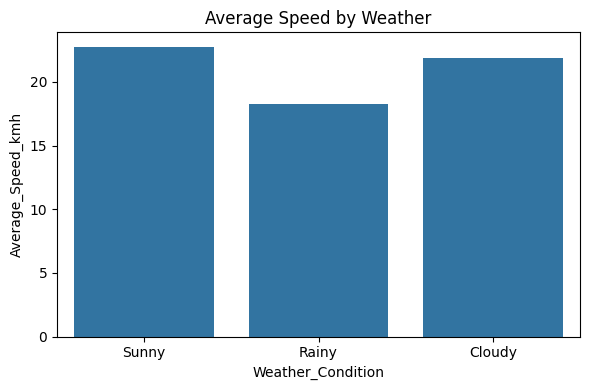

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='Weather_Condition', y='Average_Speed_kmh', data=df, estimator='mean', ci=None)
plt.title('Average Speed by Weather')
plt.tight_layout()
plt.show()


## Weekend vs Weekday Speed

In [17]:
df.groupby('Is_Weekend')['Average_Speed_kmh'].agg(['mean', 'std', 'min', 'max']).rename(index={False: 'Weekday', True: 'Weekend'})


,mean,std,min,max
Is_Weekend,,,,
Weekday,18.900448,6.146863,8.4,52.1
Weekend,30.250000,7.531837,16.7,48.5


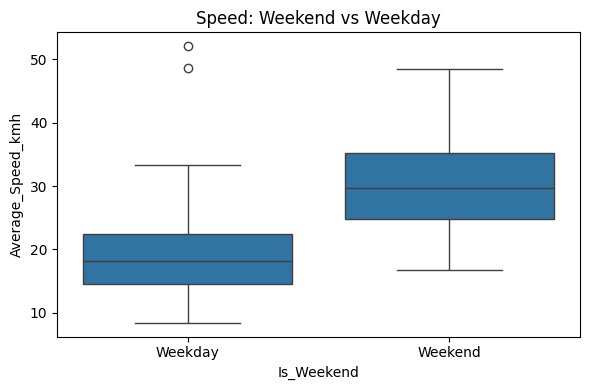

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Is_Weekend', y='Average_Speed_kmh', data=df)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title('Speed: Weekend vs Weekday')
plt.tight_layout()
plt.show()


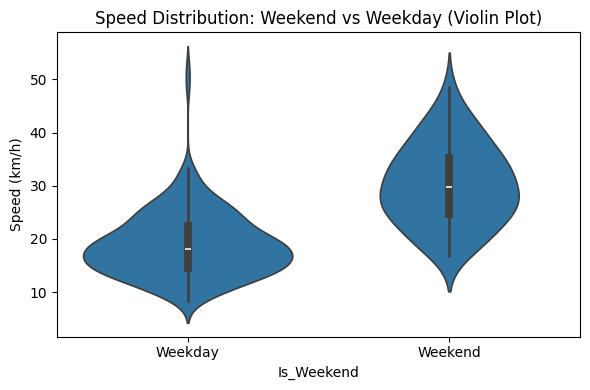

In [19]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Is_Weekend', y='Average_Speed_kmh', data=df)
plt.title('Speed Distribution: Weekend vs Weekday (Violin Plot)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.ylabel('Speed (km/h)')
plt.tight_layout()
plt.show()


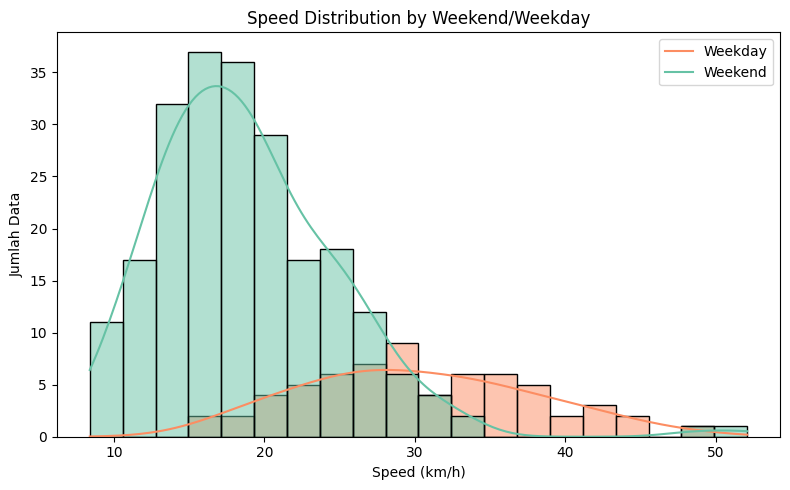

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Average_Speed_kmh', bins=20, hue='Is_Weekend', kde=True, palette='Set2')
plt.title('Speed Distribution by Weekend/Weekday')
plt.xlabel('Speed (km/h)')
plt.ylabel('Jumlah Data')
plt.legend(labels=['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()


## 🧠 Insight:
* Weekend: distribution is more symmetrical and high, meaning many vehicles are at normal speed
* Weekday: distribution shifts to the left, many vehicles are blocked → most likely due to rush hour and high vehicle volume

## summary :
* Based on the speed distribution histogram, the average vehicle speed is significantly lower during weekdays compared to weekends. This supports the hypothesis that weekday traffic in Jakarta is more congested, likely due to work commutes and higher vehicle volume."

